In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, pickle
from matplotlib.pyplot import *

In [2]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
s = mb.bc**2/2/np.pi

In [3]:
fxtau, fxtbh, fxtBH = {}, {}, {}
for fltr in ['none','cinv']:
    for ascale in [1.0,0.0]:
        p = prjlib.init_analysis(fltr=fltr,wtype='Lmask',tausig=True)
        qtau, qlen, qsrc, qtbh, qtBH = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
        cy = tools_y.init_compy(p.ids,masktype=0,ytype='milca',ascale=ascale)
        fxtau[fltr,str(ascale)] = tools_y.init_cross(qtau,cy,p.ids,p.stag)
        fxtbh[fltr,str(ascale)] = tools_y.init_cross(qtbh,cy,p.ids,'bh_'+p.stag)
        fxtBH[fltr,str(ascale)] = tools_y.init_cross(qtBH,cy,p.ids,'BH_'+p.stag)

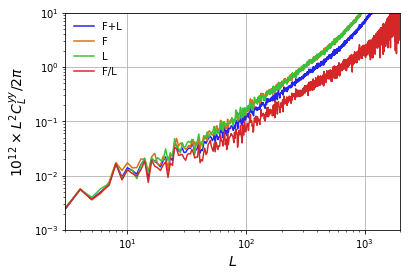

In [4]:
l, y0, y1, y2, xl = np.loadtxt(cy.fclyy,unpack=True,usecols=(0,1,2,3,4))
pl.plot_1dstyle(xmin=3,xmax=2000,ymin=1e-3,ymax=10,xlog=True,ylog=True,grid=True,ylab=r'$10^{12}\times L^2C^{yy}_L/2\pi$')
S = l**2/2/np.pi*1e12
plot(l,S*y0,label='F+L')
plot(l,S*y1,label='F')
plot(l,S*y2,label='L')
plot(l,S*xl,label='F/L')
legend()

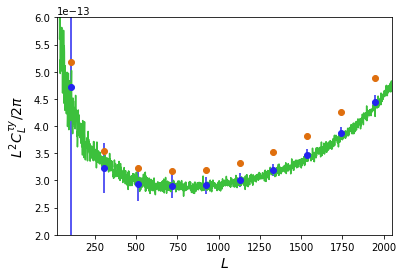

In [5]:
#for xobj in [fxtau['cinv','1.0'],fxtbh['cinv','1.0'],fxtBH['cinv','1.0']]:
cltt = prjlib.tau_spec(2048)
clty = np.sqrt(y0*cltt)*.9
for xobj in [fxtBH['none','1.0']]:
    mcb, vcb, scb = bn.binned_spec(mb,xobj.xl[:101],cn=1,doreal=False)
    pl.plot_1dstyle(ymin=2e-13,ymax=6e-13,ylab=r'$L^2C_L^{\tau y}/2\pi$')
    errorbar(mb.bc,mcb,yerr=vcb,fmt='o')
    errorbar(mb.bc,mcb*1.1,fmt='o')
    plot(clty)
    axhline(0.,color='k',ls='--')
    show()

In [6]:
for xobj in [fxtau['cinv','1.0'],fxtbh['cinv','1.0'],fxtBH['cinv','1.0']]:
    mcb, vcb, scb, ocb = bn.binned_spec(mb,xobj.xl,cn=1)
    pl.plot_1dstyle(ymin=-8e-9,ymax=8e-9,ylab=r'$L^2C_L^{\tau y}/2\pi$')
    errorbar(mb.bc,s*(ocb-mcb),yerr=s*vcb,fmt='o')
    axhline(0.,color='k',ls='--')
    show()

OSError: /global/cscratch1/sd/toshiyan/plk/xcor//aps//rlz/xl_TT_tau_dr2_smica_Lmask_a0.0deg_cinv_tausig_l100-2048_milca_M1_a1.0deg_00000.dat not found.

In [ ]:
plot(mb.bc,vcb)

In [ ]:
cov = np.cov(scb[1:,:],rowvar=0)
dcov = np.diag(1./np.sqrt(np.diag(cov)))
corr = np.matmul(np.matmul(dcov,cov),dcov)
print(corr)

In [ ]:
pl.plot_corr(corr,b[:10]*3)